<a href="https://colab.research.google.com/github/dancher00/Experimental-Data-Analysis/blob/main/exponential_and_running_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import shift

np.random.seed(42)

# Assignment 2
# Comparison of the exponential and running mean for random walk model

#### Team 1:
-Zargham Ali Mirza(left the course): learned new ways on how to work with numpy, helped with theoretical part\
-Roman Khalikov: overall coding, plots and report \
-Danil Belov: code and report review, fixes, did assignment 3 based on this code \
Everybody partisipated in discussions about the taks, conclusion and report.


## Part 1. Determination of optimal smoothing constant in exponential mean

### 1.1 True trajectory generation

In [ ]:
# Group 1 trajectory noise variance
sigma_w = 8

size_of_trajectory_1 = 30000
size_of_trajectory_2 = 300

true_trajectory_1 = np.zeros(size_of_trajectory_1)
true_trajectory_2 = np.zeros(size_of_trajectory_2)

# Normally distributed random noise with zero mathematical expectation and variance sigma_w
noise_1 = np.random.normal(0, np.sqrt(sigma_w), size_of_trajectory_1-1)
noise_2 = np.random.normal(0, np.sqrt(sigma_w), size_of_trajectory_2-1)

# Initial condition X_1
true_trajectory_1[0] = true_trajectory_2[0] = 10

# Random walk model
for i in range(1,size_of_trajectory_1):
    true_trajectory_1[i] = true_trajectory_1[i-1] + noise_1[i-1]
for i in range(1, size_of_trajectory_2):
    true_trajectory_2[i] = true_trajectory_2[i-1] + noise_2[i-1]

### 1.2 Measurements of the process generation

In [ ]:
# Group 1 measurement noise variance
sigma_eta = 16

# Normally distributed random noise with zero mathematical expectation and variance sigma_eta
measurement_noise_1 = np.random.normal(0, np.sqrt(sigma_eta), size_of_trajectory_1)
measurement_noise_2 = np.random.normal(0, np.sqrt(sigma_eta), size_of_trajectory_2)

# Measurements generation
measurement_1 = true_trajectory_1 + measurement_noise_1
measurement_2 = true_trajectory_2 + measurement_noise_2

## 2. Variance indetification

In [ ]:

residual_nu_1 = measurement_1 - shift(measurement_1, 1)
residual_nu_2 = measurement_2 - shift(measurement_2, 1)

residual_rho_1 = measurement_1 - shift(measurement_1, 2)
residual_rho_2 = measurement_2 - shift(measurement_2, 2)

nu_expectation_1 = (residual_nu_1**2).mean()
nu_expectation_2 = (residual_nu_2**2).mean()

rho_expectation_1 = (residual_rho_1**2).mean()
rho_expectation_2 = (residual_rho_2**2).mean()

# Solving system of equations to estimate sigmas
a = np.array([[1,2],[2,2]])
b_1 = np.array([nu_expectation_1, rho_expectation_1])
b_2 = np.array([nu_expectation_2, rho_expectation_2])

estimated_sigma_w_1, estimated_sigma_eta_1 = np.linalg.solve(a, b_1)
estimated_sigma_w_2, estimated_sigma_eta_2 = np.linalg.solve(a, b_2)

print(f'Given sigma_w = {sigma_w}, estimated sigmas for long and short trajectory respectively equals to {estimated_sigma_w_1} and {estimated_sigma_w_2}')
print(f'Given sigma_eta = {sigma_eta}, estimated sigmas for long and short trajectory respectively equals to {estimated_sigma_eta_1} and {estimated_sigma_eta_2}')
print(f'Accuracy of {size_of_trajectory_1} length trajectory sigma_w estimation is {np.round(1-np.abs(estimated_sigma_w_1-sigma_w)/sigma_w,2)}\n\
Accuracy of {size_of_trajectory_2} length trajectory sigma_w estimation is {np.round(1-np.abs(estimated_sigma_w_2-sigma_w)/sigma_w,2)}\n\
Accuracy of {size_of_trajectory_1} length trajectory sigma_eta estimation is {np.round(1-np.abs(estimated_sigma_eta_1-sigma_eta)/sigma_eta,2)}\n\
Accuracy of {size_of_trajectory_2} length trajectory sigma_eta estimation is {np.round(1-np.abs(estimated_sigma_eta_2-sigma_eta)/sigma_eta,2)}')
print('As expected the estimation for the longer trajectory is much better')

Given sigma_w = 8, estimated sigmas for long and short trajectory respectively equals to 7.732023518906459 and 11.614807405146195
Given sigma_eta = 16, estimated sigmas for long and short trajectory respectively equals to 16.294446318009346 and 13.085966812535574
Accuracy of 30000 length trajectory sigma_w estimation is 0.97
Accuracy of 300 length trajectory sigma_w estimation is 0.55
Accuracy of 30000 length trajectory sigma_eta estimation is 0.98
Accuracy of 300 length trajectory sigma_eta estimation is 0.82
As expected the estimation for the longer trajectory is much better


### 3. Smoothing coefficient determination

In [ ]:
chi_1 = estimated_sigma_w_1/estimated_sigma_eta_1
chi_2 = estimated_sigma_w_2/estimated_sigma_eta_2

alpha_1 = (-chi_1 + np.sqrt(chi_1**2+4*chi_1))*0.5
alpha_2 = (-chi_2 + np.sqrt(chi_2**2+4*chi_2))*0.5
print(f'{alpha_1}, {alpha_2}')

0.49130830308770357, 0.5976169748731806


### 4. Exponential smoothing and results

In [ ]:
# exponential smoothing for the measurements
def exponential_mean(z, alpha):
    smoothed = np.zeros(len(z))
    smoothed[0] = alpha*z[0]
    for i in range(1,len(z)):
        smoothed[i] = smoothed[i-1] + alpha * (z[i] - smoothed[i-1])
    return smoothed

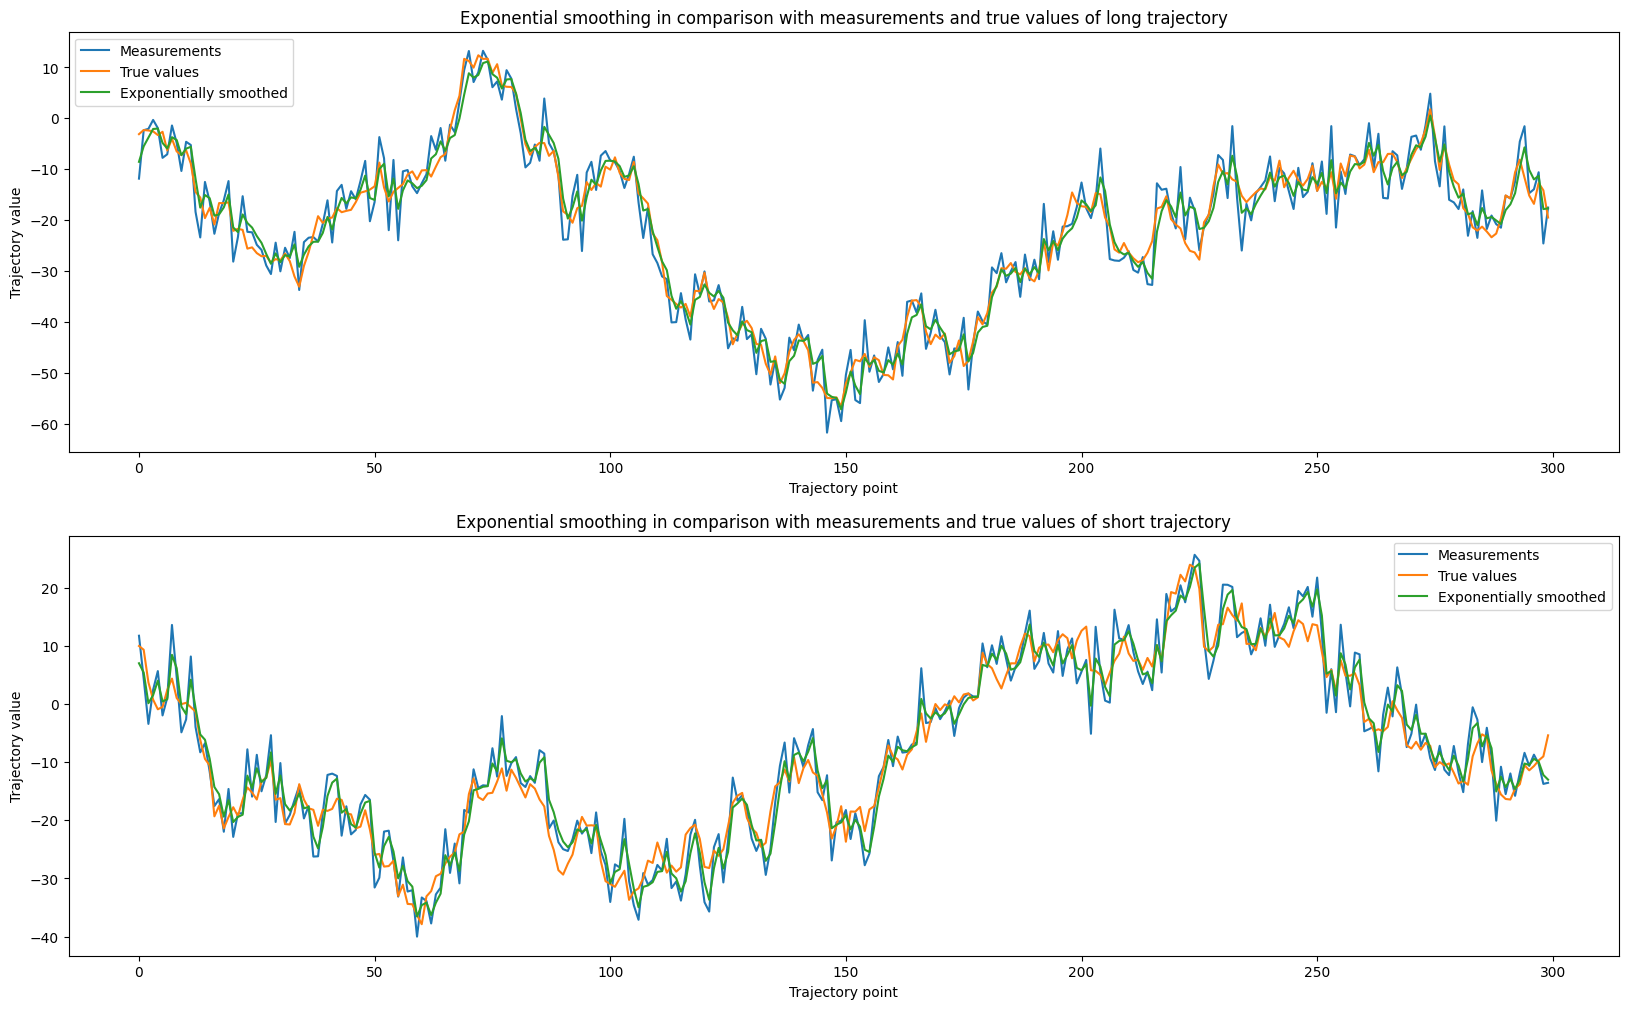

In [ ]:
smoothed_1 = exponential_mean(measurement_1, alpha_1)
smoothed_2 = exponential_mean(measurement_2, alpha_2)

plt.figure(figsize=(20, 12))
plt.subplot(2, 1, 1)
# To visually analyze the effect of smoothing, lets take only small part of data
plt.title('Exponential smoothing in comparison with measurements and true values of long trajectory')
plt.plot(measurement_1[-300:], label = 'Measurements')
plt.plot(true_trajectory_1[-300:], label = 'True values')
plt.plot(smoothed_1[-300:], label = 'Exponentially smoothed')
plt.ylabel('Trajectory value')
plt.xlabel('Trajectory point')
plt.legend()

plt.subplot(2, 1, 2)
plt.title('Exponential smoothing in comparison with measurements and true values of short trajectory')
plt.plot(measurement_2, label = 'Measurements')
plt.plot(true_trajectory_2, label = 'True values')
plt.plot(smoothed_2, label = 'Exponentially smoothed')
plt.ylabel('Trajectory value')
plt.xlabel('Trajectory point')
plt.legend()

As a result we smoothed the measurement curve using exponential mean technique, the smoothed curve is closer to the true values so we reconstructed a more accurate curve using noisy measurements. And also we can see that the smoothing is better for the longer curve because of the alpha coeffitient approximation issue.

## Part 2. Comparison of methodical errors of exponential and running mean

### 1 True trajectory generation

In [ ]:
# Group 1 trajectory noise variance
sigma_w = 28**2

size_of_trajectory = 300

true_trajectory = np.zeros(size_of_trajectory)


# Normally distributed random noise with zero mathematical expectation and variance sigma_w
noise = np.random.normal(0, np.sqrt(sigma_w), size_of_trajectory-1)

# Initial condition X_1
true_trajectory[0] = 10

# Random walk model
for i in range(1,size_of_trajectory):
    true_trajectory[i] = true_trajectory[i-1] + noise[i-1]

### 2 Measurements of the process generation

In [ ]:
# Group 1 measurement noise variance
sigma_eta = 97**2

# Normally distributed random noise with zero mathematical expectation and variance sigma_eta
measurement_noise = np.random.normal(0, np.sqrt(sigma_eta), size_of_trajectory)

# Measurements generation
measurement = true_trajectory + measurement_noise

### 3 Optimal smoothing coefficient alpha determination

In [ ]:
chi = sigma_w/sigma_eta
alpha = (-chi + np.sqrt(chi**2+4*chi))*0.5
alpha

0.24998861233121078

### 4 Window size M determination

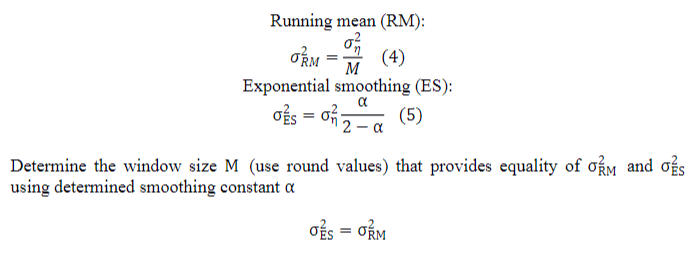

In [ ]:
sigma_rm = sigma_es = sigma_eta*alpha/(2-alpha)
M = int(np.round(sigma_eta/sigma_rm))
M

7

### 5 Running and exponential mean applying

In [ ]:
# Universal running mean function which accepts numpy array and appropriate window size
def running_mean(z, window_size):
    if not window_size%2 or not window_size > 1:
        raise Exception('Window size must be odd and > 1')
    result = np.zeros_like(z)
    interval = int((window_size-1)/2)
    for i in range(-interval,interval+1):
        result = result + shift(z, i)/window_size
    return result

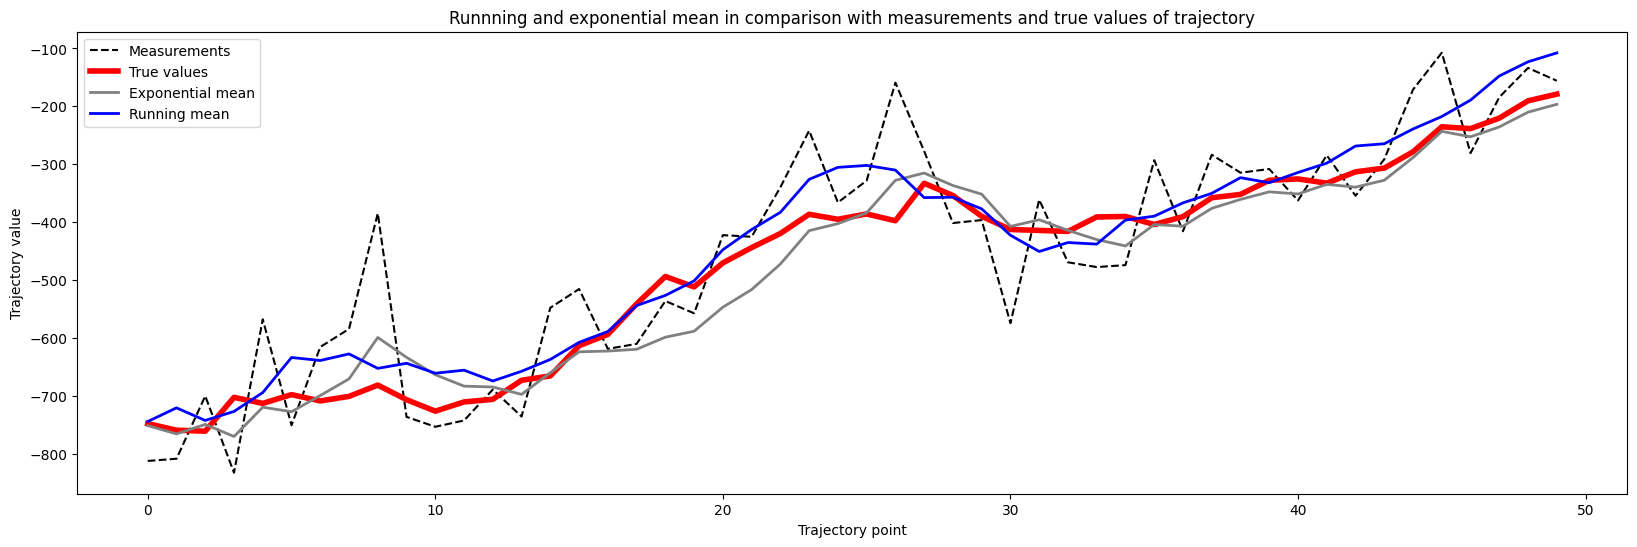

In [ ]:
exponential_smoothing = exponential_mean(measurement, alpha)
mean_smoothing = running_mean(measurement,M)

plt.figure(figsize=(20, 6))
# To visually analyze the effect of smoothing, lets take only small part of data
plt.title('Runnning and exponential mean in comparison with measurements and true values of trajectory')
plt.plot(measurement[250:], '--', color = 'black', label = 'Measurements')
plt.plot(true_trajectory[250:], label = 'True values', c='red', linewidth=4)
plt.plot(exponential_smoothing[250:], label = 'Exponential mean', c = 'gray', linewidth=2)
plt.plot(mean_smoothing[250:], label = 'Running mean', c = 'blue', linewidth=2)
plt.ylabel('Trajectory value')
plt.xlabel('Trajectory point')
plt.legend()

If we speaking about methodical error the running mean technique doubles the error when the rate of the process changes to the opposite sign, so the exponential mean should give lesser methodical error. But since it is a random walking model without great variations of the true trajectory with almost constant rate of the process we can say that the running mean should give zero methodical errors. Let's make final conclusion based on the indicators:

In [ ]:
def deviation_indicator(z, x):
    return ((z-x)**2).sum()
def variability_indicator(x):
    return ((shift(x, -2)[:-2] - 2 * shift(x, -1)[:-2] + x[:-2])**2).sum()

In [ ]:
print(f'Deviation indicator for running mean = {deviation_indicator(measurement, mean_smoothing)}; exponential mean = {deviation_indicator(measurement, exponential_smoothing)}')
print(f'Variability indicator for running mean = {variability_indicator(mean_smoothing)}; exponential mean = {variability_indicator(exponential_smoothing)}')
print(f'Variance of measurements data = {measurement.var()}')

Deviation indicator for running mean = 2280937.9308703933; exponential mean = 2047222.5491003003
Variability indicator for running mean = 233598.2956926676; exponential mean = 425835.7634585827
Variance of measurements data = 91164.83024817464


Since this random walking model has low variance, the running mean gives better results without significant difference in deviation indicator for both methods.

# Conclusion

In the end we learned that we should carefully investigate the process itself to choose the proper estimation method. Learned that we can approximate the variance of the measurement and the process and to efficiently choose the parameters of such methods we should take as much measurements as we can otherwise the accuracy of estimation will be bad. We investigated two quasi-optimal methods and practically seen that for a data that can suddenly change it's value across the time we should prefer exponential mean method.